In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cp_utils.cp_dir_file_ops import define_env

if define_env() == 'SERVER':
    dir = '/home/neo/PycharmProjects/Course1/subprojects/sp02_omniiseg_fgn_mmdet/COCO2VOC_DCL_N1_K1'
elif define_env() == 'PC':
    dir = 'C:/Users/Art/PycharmProjects/Course1/subprojects/sp02_omniiseg_fgn_mmdet/COCO2VOC_DCL_N1_K1'
else:
    raise NotImplementedError

tag = 'COCO_val_FT_Ignore_bbox_mAP_base_'

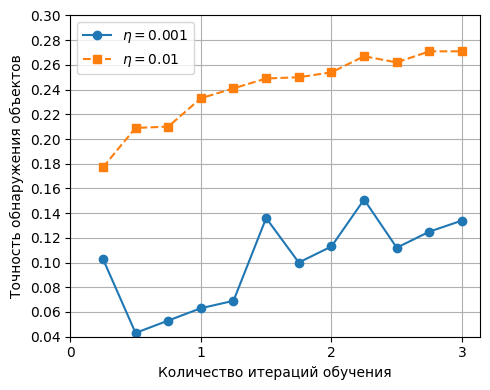

____________________________________________________________________________________________________
\eta = 0.001 & 0.151 \\ \hline 
\eta = 0.01 & 0.271 \\ \hline 
____________________________________________________________________________________________________
0.001 & 0.01 \\
0.151 & 0.271 \\


In [2]:
sp0 = f'2022-02-15_22-01-36_Train-1-1-DenseCL-COCO2VOC-Train LR 0.001 WD 1e-05 Adagrad Res5-GN-tag-{tag}.csv'
sp1 = f'2022-02-16_08-10-30_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adagrad Res5-GN-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)

fig = plt.figure(figsize=(5, 4), dpi=100, facecolor='white')

plt.ylabel('Точность обнаружения объектов')
accuracy = np.arange(31, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.04, 0.3)

plt.xlabel('Количество итераций обучения')
epochs = np.arange(12, dtype=np.int32) + 1
plt.plot(epochs, data0, '-o',  label=r'$\eta = 0.001 $')
plt.plot(epochs, data1, '--s', label=r'$\eta = 0.01 $')

xticks = np.arange(0, 4, dtype=np.int32)
# 4 points per epoch
plt.xticks(xticks * 4, xticks)

plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('COCO2VOC_DCL_N1_K1_Experiments_LR.png', facecolor=fig.get_facecolor(), edgecolor='none', transparent=False)
plt.show()

print('_' * 100)
print('\eta = 0.001', np.max(data0), sep=' & ', end=' \\\\ \\hline \n')
print('\eta = 0.01', np.max(data1), sep=' & ', end=' \\\\ \\hline \n')

print('_' * 100)
print('0.001', '0.01', sep=' & ', end=' \\\\\n')
print(np.max(data0), np.max(data1), sep=' & ', end=' \\\\\n')

del fp0, fp1
del data0, data1
del accuracy, epochs, xticks

plt.close('all')

# The result: learning rate 0.01 seems OK in this task for Adagrad.
# Since Adam showed itself quite well in the MNISTISEG, and will be tested next,
# learning rate for Adagrad was not tested more.
# Also, this time the res5 block normalization was changed to GN in all the models.

\begin{table}[]
    \begin{tabular}{|c|c|c|c|c|c|c|}
        \hline
         Коэффициент~обучения~\eta & 0.001 & 0.01  \\ \hline
         Точность                  & 0.151 & 0.271 \\ \hline
    \end{tabular}
\end{table}

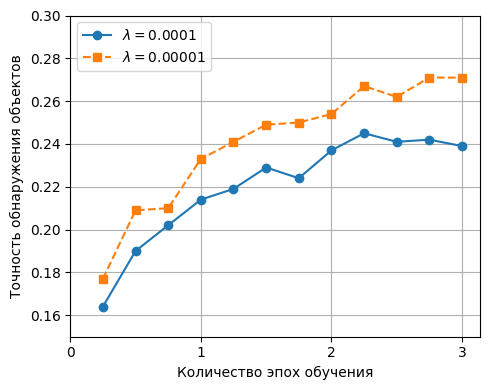

____________________________________________________________________________________________________
\lambda = 0.0001, 0.245
\lambda = 0.00001, 0.271
____________________________________________________________________________________________________
0.0001 & 0.00001 \\
0.245 & 0.271 \\


In [3]:
sp0 = f'2022-02-16_17-52-02_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 0.0001 Adagrad Res5-GN-tag-{tag}.csv'
sp1 = f'2022-02-16_08-10-30_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adagrad Res5-GN-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)

fig = plt.figure(figsize=(5, 4), dpi=100, facecolor='white')

plt.ylabel('Точность обнаружения объектов')
accuracy = np.arange(31, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.15, 0.3)

plt.xlabel('Количество эпох обучения')
epochs = np.arange(12, dtype=np.int32) + 1
plt.plot(epochs, data0, '-o', label=r'$\lambda = 0.0001 $')
plt.plot(epochs, data1, '--s', label=r'$\lambda = 0.00001 $')

xticks = np.arange(0, 4, dtype=np.int32)
# 4 times per epoch
plt.xticks(xticks * 4, xticks)

plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('COCO2VOC_DCL_N1_K1_Experiments_WD.png',
            facecolor=fig.get_facecolor(),
            edgecolor='none',
            transparent=False)
plt.show()

print('_' * 100)
print('\lambda = 0.0001,', np.max(data0))
print('\lambda = 0.00001,', np.max(data1))

print('_' * 100)
print('0.0001', '0.00001', sep=' & ', end=' \\\\\n')
print(np.max(data0), np.max(data1), sep=' & ', end=' \\\\\n')

del fp0, fp1
del data0, data1
del accuracy, epochs, xticks

plt.close('all')

# The result: for the same reason as for LR, WD = 1e-5 was OK
# for Adagrad and was not tested more.

\begin{table}[]
    \begin{tabular}{|c|c|}
        \hline
        Коэффициент~оптимизации~\lambda & Точность \\ \hline
        \lambda = 0.00001               & 0.271    \\ \hline
        \lambda = 0.0001                & 0.245    \\ \hline
    \end{tabular}
\end{table}

\begin{table}[]
    \begin{tabular}{|c|c|c|c|c|c|c|}
        \hline
         Коэффициент \\ оптимизации~\lambda & 0.00001 & 0.0001 \\ \hline
         Точность                           & 0.271  &  0.245   \\ \hline
    \end{tabular}
\end{table}

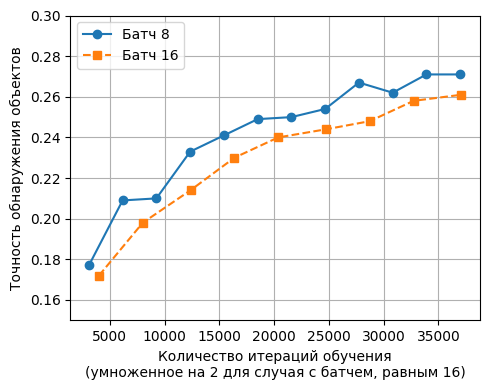

____________________________________________________________________________________________________
Batch 8, 0.271
Batch 16, 0.261
____________________________________________________________________________________________________
4 & 8 \\
0.271 0.261


In [4]:
sp0 = f'2022-02-16_08-10-30_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adagrad Res5-GN-tag-{tag}.csv'
sp1 = f'2022-02-16_18-06-54_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adagrad Res5-GN B16-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)
steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3) * 2

fig = plt.figure(figsize=(5, 4), dpi=100, facecolor='white')

plt.ylabel('Точность обнаружения объектов')
accuracy = np.arange(31, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.15, 0.3)

plt.xlabel("Количество итераций обучения\n(умноженное на 2 для случая с батчем, равным 16)")
plt.plot(steps0, data0, '-o', label=r'Батч 8')
plt.plot(steps1, data1, '--s', label=r'Батч 16')

plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
plt.savefig('COCO2VOC_DCL_N1_K1_Experiments_Batch.png',
            facecolor=fig.get_facecolor(),
            edgecolor='none',
            transparent=False)
plt.show()

print('_' * 100)
print('Batch 8,', np.max(data0))
print('Batch 16,', np.max(data1))

print('_' * 100)
print('4', '8', sep=' & ', end=' \\\\\n')
print(np.max(data0), np.max(data1))

del fp0, fp1
del data0, data1
del steps0, steps1
del accuracy

# The result: batch size 16 did not show a better performance because of the same LR.
# By the way, batch size 16 required larger memory, more than 12 GB, which is important.

\begin{table}[]
    \begin{tabular}{|c|c|c|c|c|c|c|}
        \hline
         Batch size & 8         & 16       \\ \hline
         Точность   & 0.271     &  0.261   \\ \hline
    \end{tabular}
\end{table}

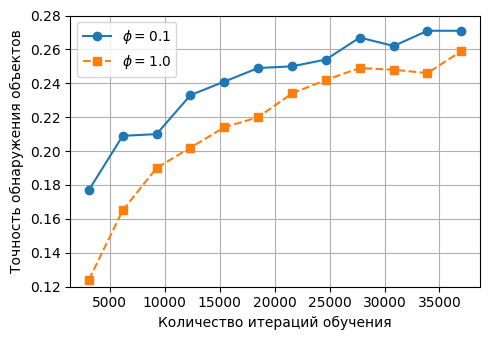

\phi = 0.1, 0.271
\phi = 1.0, 0.259


In [5]:
sp0 = f'2022-02-16_08-10-30_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adagrad Res5-GN-tag-{tag}.csv'
sp1 = f'2022-02-18_09-41-30_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adagrad Res5-GN NoLRRescale-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)
steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3)

fig = plt.figure(figsize=(5, 3.5), dpi=100, facecolor='white')

plt.ylabel('Точность обнаружения объектов')
accuracy = np.arange(31, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.12, 0.28)

plt.xlabel('Количество итераций обучения')
plt.plot(steps0, data0, '-o',  label='$\phi = 0.1$')
plt.plot(steps1, data1, '--s', label='$\phi = 1.0$')

plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_DCL_N1_K1_Experiments_Rescale.png',
            facecolor=fig.get_facecolor(),
            edgecolor='none',
            transparent=False)
plt.show()

print('\phi = 0.1,', np.max(data0))
print('\phi = 1.0,', np.max(data1))

del fp0, fp1
del data0, data1
del steps0, steps1
del accuracy

# The result: learning rate rescale is required here maybe because of an occluded background

\begin{table}[]
    \begin{tabular}{|c|c|}
        \hline
        Value           & Точность \\ \hline
        \psi = 0.1     & 0.271     \\ \hline
        \psi = 1.0     & 0.259     \\ \hline
    \end{tabular}
\end{table}

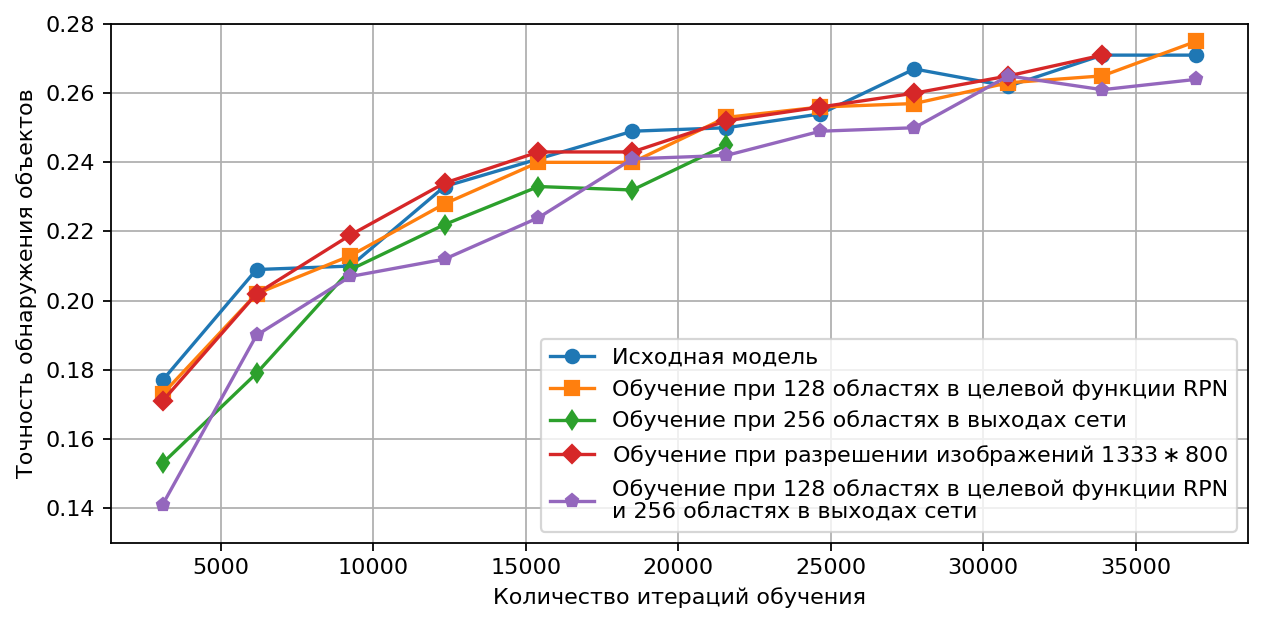

Base & RPN 128 & ROI 256 & HDR & RPN 128 And ROI 256
0.271 & 0.275 & 0.245 & 0.271 & 0.265


In [6]:
sp0 = f'2022-02-16_08-10-30_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adagrad Res5-GN-tag-{tag}.csv'
sp1 = f'2022-02-18_10-10-11_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adagrad Res5-GN RPNHead 128-tag-{tag}.csv'
sp2 = f'2022-02-18_09-48-20_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adagrad Res5-GN ROIHead 256-tag-{tag}.csv'
sp3 = f'2022-02-18_10-18-05_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adagrad Res5-GN HDR-tag-{tag}.csv'
sp4 = f'2022-02-18_23-52-38_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adagrad Res5 ROI256 RPN128 NO-HDR-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)
fp2 = os.path.join(dir, sp2)
fp3 = os.path.join(dir, sp3)
fp4 = os.path.join(dir, sp4)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)
data2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 2], decimals=3)
data3 = np.around(np.loadtxt(fp3, delimiter=',', skiprows=1)[:, 2], decimals=3)
data4 = np.around(np.loadtxt(fp4, delimiter=',', skiprows=1)[:, 2], decimals=3)

steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps3 = np.around(np.loadtxt(fp3, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps4 = np.around(np.loadtxt(fp4, delimiter=',', skiprows=1)[:, 1], decimals=3)

fig = plt.figure(figsize=(8, 4), dpi=160, facecolor='white')

plt.ylabel('Точность обнаружения объектов')
accuracy = np.arange(31, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.13, 0.28)

plt.xlabel('Количество итераций обучения')
steps = np.arange(8, dtype=np.int32) * 5000
plt.xticks(steps)

plt.plot(steps0, data0, '-o', label='Исходная модель')
plt.plot(steps1, data1, '-s', label='Обучение при 128 областях в целевой функции RPN')
plt.plot(steps2, data2, '-d', label='Обучение при 256 областях в выходах сети')
plt.plot(steps3, data3, '-D', label=r'Обучение при разрешении изображений $1333 \ast 800$')
plt.plot(steps4, data4, '-p', label='Обучение при 128 областях в целевой функции RPN'
                              '\nи 256 областях в выходах сети')

plt.grid(True)
# plt.legend(loc='upper left')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('COCO2VOC_DCL_N1_K1_ArchExps.png', facecolor=fig.get_facecolor(), edgecolor='none', transparent=False)
plt.show()

print('Base', 'RPN 128', 'ROI 256', 'HDR', 'RPN 128 And ROI 256', sep=' & ')
print(np.max(data0), np.max(data1), np.max(data2), np.max(data3), np.max(data4), sep=' & ')

del fp0, fp1, fp2, fp3, fp4
del data0, data1, data2, data3, data4
del steps, steps0, steps1, steps2, steps3, steps4
del accuracy

# In the result, RPN 128 lead to an almost no gain with 20% larger train time.
# Test time RPN and ROI did not change.
# Despite loss gets lower, improvements did not lead to a
# visible larger accuracy of the network at all.
# HDR showed helped to achieve a larger segmentation accuracy.
# Concerns were checked with training with Adam

\begin{table}[]
    \begin{tabular}{|c|c|c|c|c|c|}
        \hline
        Variant  &  Base & RPN 128 & ROI 256  & HDR   &  RPN 128 And ROI 256    \\ \hline
        Accuracy & 0.271 & 0.275   & 0.245    & 0.271 &  0.265  \\ \hline
    \end{tabular}
\end{table}

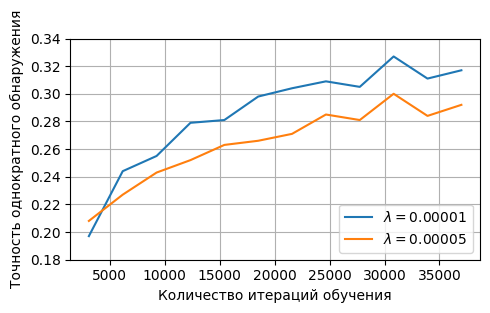

In [7]:
sp0 = f'2022-02-18_23-58-03_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adam Res5-GN-tag-{tag}.csv'
sp1 = f'2022-02-19_00-00-30_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 5e-05 Adam Res5-GN-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)
steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3)

fig = plt.figure(figsize=(5, 3), dpi=100, facecolor='white')

plt.ylabel('Точность однократного обнаружения')
accuracy = np.arange(35, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.18, 0.34)

plt.xlabel('Количество итераций обучения')
epochs = np.arange(12, dtype=np.int32) + 1
# xticks = np.arange(0, 4, dtype=np.int32)
# # 4 points per epoch
# plt.xticks(xticks * 4, xticks)

plt.plot(steps0, data0, label=r'$\lambda = 0.00001 $')
plt.plot(steps1, data1, label=r'$\lambda = 0.00005 $')

plt.grid(True)
# plt.legend(loc='upper left')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_DCL_N1_K1_Experiments_WD_Adam.png', facecolor=fig.get_facecolor(), edgecolor='none',
            transparent=False)
plt.show()

# The result: Adam showed a much better performance than Adagrad.
# But it is very sensitive to the WD.

In [8]:
print('0.00001', '0.00005', sep=' & ', end=' \\\\\n')
print(np.max(data0), np.max(data1), sep=' & ', end=' \\\\\n')

0.00001 & 0.00005 \\
0.327 & 0.3 \\



\begin{table}[]
    \begin{tabular}{|c|c|c|c|c|c|c|}
        \hline
         Коэффициент \\ оптимизации~\lambda & 0.00001 & 0.00005 \\ \hline
         Точность                           & 0.327  &  0.300   \\ \hline
    \end{tabular}
\end{table}

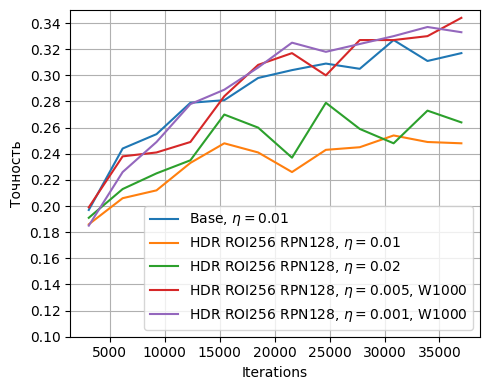

In [9]:
sp0 = f'2022-02-18_23-58-03_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adam Res5-GN-tag-{tag}.csv'
sp1 = f'2022-02-19_00-06-28_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 5e-05 Adam Res5-GN HDR ROI256 RPN128-tag-{tag}.csv'
sp2 = f'2022-02-19_16-08-43_Train-1-1-DenseCL-COCO2VOC-Train LR 0.02 WD 1e-05 Adam Res5-GN HDR ROI256 RPN128-tag-{tag}.csv'
sp3 = f'2022-02-20_08-40-08_Train-1-1-DenseCL-COCO2VOC-Train LR 0.005 WD 1e-05 Adam Res5-GN HDR ROI256 RPN128 Warmup1000 steps-tag-{tag}.csv'
sp4 = f'2022-02-21_23-48-55_Train-1-1-DenseCL-COCO2VOC-Train LR 0.001 WD 1e-05 Adam Res5-GN HDR ROI256 RPN128 Warmup1000 steps-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)
fp2 = os.path.join(dir, sp2)
fp3 = os.path.join(dir, sp3)
fp4 = os.path.join(dir, sp4)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)
data2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 2], decimals=3)
data3 = np.around(np.loadtxt(fp3, delimiter=',', skiprows=1)[:, 2], decimals=3)[:len(data0)]
data4 = np.around(np.loadtxt(fp4, delimiter=',', skiprows=1)[:, 2], decimals=3)

steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps3 = np.around(np.loadtxt(fp3, delimiter=',', skiprows=1)[:, 1], decimals=3)[:len(data0)]
steps4 = np.around(np.loadtxt(fp4, delimiter=',', skiprows=1)[:, 1], decimals=3)

fig = plt.figure(figsize=(5, 4), dpi=100, facecolor='white')

plt.ylabel('Точность')
accuracy = np.arange(31, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.1, 0.35)

plt.xlabel('Iterations')
steps = np.arange(8, dtype=np.int32) * 5000
plt.xticks(steps)

plt.plot(steps0, data0, label='Base, $\eta=0.01$')
plt.plot(steps1, data1, label='HDR ROI256 RPN128, $\eta=0.01$')
plt.plot(steps2, data2, label='HDR ROI256 RPN128, $\eta=0.02$')
plt.plot(steps3, data3, label='HDR ROI256 RPN128, $\eta=0.005$, W1000')
plt.plot(steps4, data4, label='HDR ROI256 RPN128, $\eta=0.001$, W1000')

plt.grid(True)
# plt.legend(loc='upper left')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_DCL_N1_K1_ArchExps_Adam.png', facecolor=fig.get_facecolor(), edgecolor='none', transparent=False)
plt.show()

# In the result, learning rate 0.005 was chosen as the best.
# Also, training shows accuracy saturation within 3 epochs (36000 steps).
# But concerns about different techniques left. Some more experiments helped to choose an appropriate set of hyper-parameters.

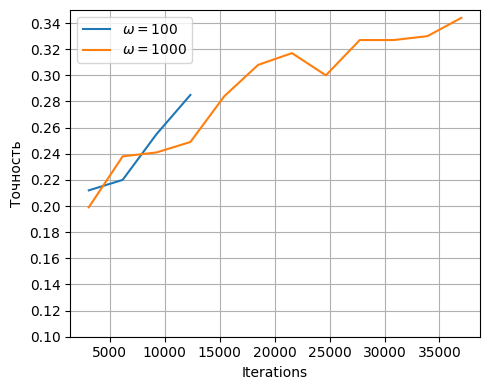

In [10]:
# Learning rate warmup
# It was interesting it LR 1000 could influence a lot on the model accuracy
sp0 = f'2022-02-20_00-05-10_Train-1-1-DenseCL-COCO2VOC-Train LR 0.005 WD 1e-05 Adam Res5-GN HDR ROI256 RPN128-tag-{tag}.csv'
sp1 = f'2022-02-20_08-40-08_Train-1-1-DenseCL-COCO2VOC-Train LR 0.005 WD 1e-05 Adam Res5-GN HDR ROI256 RPN128 Warmup1000 steps-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)[:12]

steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3)[:12]

fig = plt.figure(figsize=(5, 4), dpi=100, facecolor='white')

plt.ylabel('Точность')
accuracy = np.arange(31, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.1, 0.35)

plt.xlabel('Iterations')
steps = np.arange(8, dtype=np.int32) * 5000
plt.xticks(steps)

plt.plot(steps0, data0, label='$\omega = 100$')
plt.plot(steps1, data1, label='$\omega = 1000$')

plt.grid(True)
plt.legend(loc='upper left')
plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_DCL_N1_K1_Experiments_Optimizer.png', facecolor=fig.get_facecolor(), edgecolor='none',
            transparent=False)
plt.show()

# Despite the experiments was short, longer warmup may decrease an overall performance

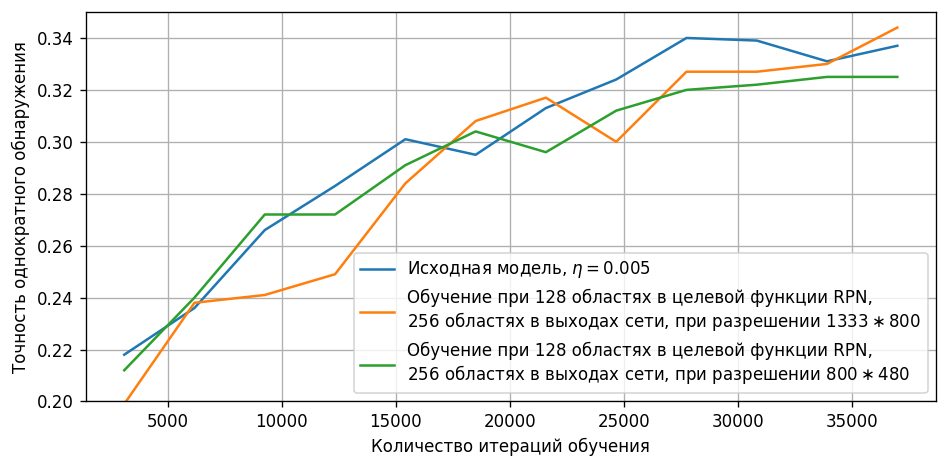

In [11]:
# Learning rate warmup
# It was interesting it LR 1000 could influence a lot on the model accuracy
sp0 = f'2022-02-20_00-01-32_Train-1-1-DenseCL-COCO2VOC-Train LR 0.005 WD 1e-05 Adam Res5-GN-tag-{tag}.csv'
sp1 = f'2022-02-20_08-40-08_Train-1-1-DenseCL-COCO2VOC-Train LR 0.005 WD 1e-05 Adam Res5-GN HDR ROI256 RPN128 Warmup1000 steps-tag-{tag}.csv'
sp2 = f'2022-02-20_07-47-14_Train-1-1-DenseCL-COCO2VOC-Train LR 0.005 WD 1e-05 Adam Res5-GN ROI256 RPN128 NO-HDR-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)
fp2 = os.path.join(dir, sp2)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)[:12]
data2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 2], decimals=3)

steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3)[:12]
steps2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 1], decimals=3)

fig = plt.figure(figsize=(8, 4), dpi=120, facecolor='white')

plt.ylabel('Точность однократного обнаружения')
accuracy = np.arange(36, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.20, 0.35)

plt.xlabel('Количество итераций обучения')
steps = np.arange(8, dtype=np.int32) * 5000
plt.xticks(steps)

plt.plot(steps0, data0, label='Исходная модель, $ \eta = 0.005 $ ')
plt.plot(steps1, data1, label='Обучение при 128 областях в целевой функции RPN,\n'
                              '256 областях в выходах сети, при разрешении '  + r'$1333 \ast 800$')
plt.plot(steps2, data2, label='Обучение при 128 областях в целевой функции RPN,\n'
                              '256 областях в выходах сети, при разрешении ' + r'$800 \ast 480$')

plt.grid(True)
# plt.legend(loc='upper left')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_DCL_N1_K1_Experiments_Resolution.png', facecolor=fig.get_facecolor(), edgecolor='none',
            transparent=False)
plt.show()

# In comparison with Adagrad experiments, ROI head increase was rejected, RPN head and HDR were used in later experiments.

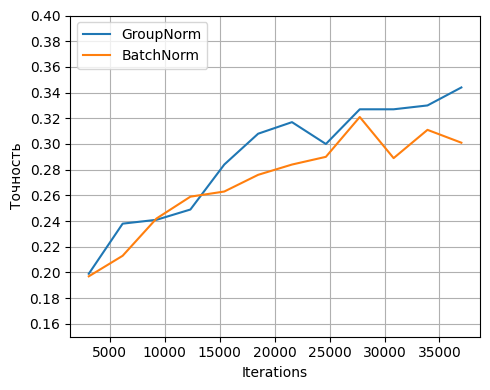

In [12]:
# Batch norm in the res5 block was also checked
# Since the batch norm did not show the best performance and used more memory, it was rejected again

sp0 = f'2022-02-20_08-40-08_Train-1-1-DenseCL-COCO2VOC-Train LR 0.005 WD 1e-05 Adam Res5-GN HDR ROI256 RPN128 Warmup1000 steps-tag-{tag}.csv'
sp1 = f'2022-02-19_15-51-24_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adam Res5-BatchNorm HDR ROI256 RPN128-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)[:12]
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)

steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3)[:12]
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3)

fig = plt.figure(figsize=(5, 4), dpi=100, facecolor='white')

plt.ylabel('Точность')
accuracy = np.arange(35, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.15, 0.4)

plt.xlabel('Iterations')
steps = np.arange(8, dtype=np.int32) * 5000
plt.xticks(steps)

plt.plot(steps0, data0, label=r'GroupNorm')
plt.plot(steps1, data1, label=r'BatchNorm')

plt.grid(True)
plt.legend(loc='upper left')
# plt.legend(loc='lower right')
plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_DCL_N1_K1_Experiments_WD_Adam.png', facecolor=fig.get_facecolor(), edgecolor='none',
            transparent=False)
plt.show()

# The result: GroupNorm shows also a better result. Assuming this models has a warmup 1000, effect could be better.
# Because of the reverse effect, some concerns about implementation may exist.

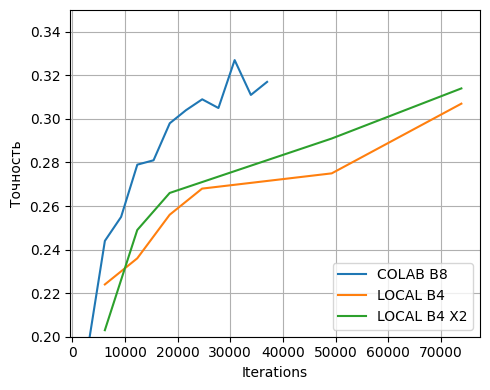

In [13]:
# Batch size
# To check if it is real to train locally with a smaller batch size, an experiment was performed
# Also, in the N1 K1 setting it was possible to train with a batch size 12, but with a set of improvements it could be not appropriate.
# Cumulative batch size
# This experiments helped to check some ideas elaborated for MNISTISEG  on a real-world dataset.

# Learning rate warmup
# It was interesting it LR 1000 could influence a lot on the model accuracy
sp0 = f'2022-02-18_23-58-03_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adam Res5-GN-tag-{tag}.csv'
sp1 = f'2022-02-19_04-30-50_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adam Res5-GN LOCAL B4-tag-{tag}.csv'
sp2 = f'2022-02-19_03-06-31_Train-1-1-DenseCL-COCO2VOC-Train LR 0.01 WD 1e-05 Adam Res5-GN LOCAL B4 X2-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)
fp2 = os.path.join(dir, sp2)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)
data2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 2], decimals=3)

steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 1], decimals=3)

fig = plt.figure(figsize=(5, 4), dpi=100, facecolor='white')

plt.ylabel('Точность')
accuracy = np.arange(36, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.20, 0.35)

plt.xlabel('Iterations')
steps = np.arange(9, dtype=np.int32) * 10000
plt.xticks(steps)

plt.plot(steps0, data0, label='COLAB B8')
plt.plot(steps1, data1, label='LOCAL B4')
plt.plot(steps2, data2, label='LOCAL B4 X2')
# plt.plot(steps3, data3, label='COLAB B12')

plt.grid(True)
# plt.legend(loc='upper left')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_DCL_N1_K1_Experiments_Optimizer.png', facecolor=fig.get_facecolor(), edgecolor='none',
            transparent=False)
plt.show()

# Experiments showed that with cumulative batch training results may be close to real batch results,
# but it is required to remember that all experiments in this section use a pretrained backbone.
# Without a pretrained backbone it might be much better to use a larger batch.
# Some additoinal experiments not depicted here showed that with batch size 12 it would be quite

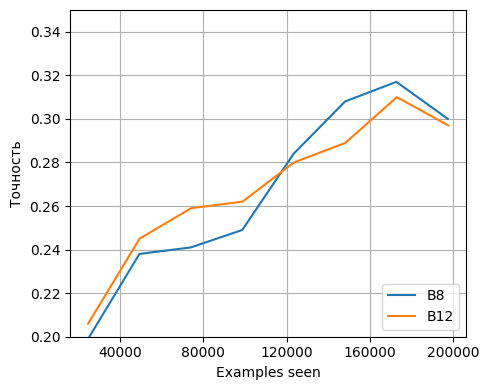

In [14]:
sp0 = f'2022-02-20_08-40-08_Train-1-1-DenseCL-COCO2VOC-Train LR 0.005 WD 1e-05 Adam Res5-GN HDR ROI256 RPN128 Warmup1000 steps-tag-{tag}.csv'
sp1 = f'2022-02-20_23-53-29_Train-1-1-DenseCL-COCO2VOC-Train LR 0.005 WD 1e-05 Adam Res5-GN HDR ROI256 RPN128 Batch 12-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)

data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)[:8]
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)

steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3)[:8] * 8
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3) * 12

fig = plt.figure(figsize=(5, 4), dpi=100, facecolor='white')

plt.ylabel('Точность')
accuracy = np.arange(36, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.20, 0.35)

plt.xlabel('Examples seen')
steps = np.arange(6, dtype=np.int32) * 40000
plt.xticks(steps)

plt.plot(steps0, data0, label='B8')
plt.plot(steps1, data1, label='B12')

plt.grid(True)
# plt.legend(loc='upper left')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_DCL_N1_K1_Experiments_B8B12.png', facecolor=fig.get_facecolor(), edgecolor='none',
            transparent=False)
plt.show()

# This graph was corrected by amount of examples seen and depicts 2 epochs in each case
# Experiments with a LR 0.005 similarly to the experiments in the Adagrad dir not show the increase because of the same LR. Higher LR may show a higher performance

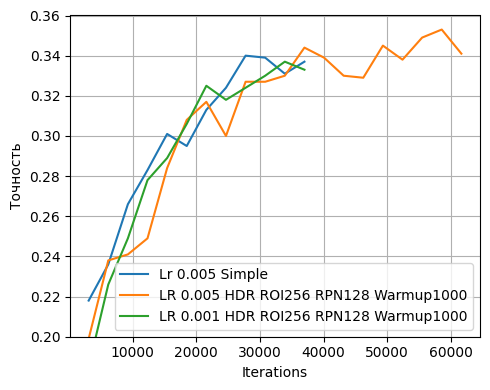

In [15]:
# Saturation
# In FGN, authors state use 0.001 and a learning rate decay after 30K steps.
# This became very similar to what we encountered during training our models.

sp0 = f'2022-02-20_00-01-32_Train-1-1-DenseCL-COCO2VOC-Train LR 0.005 WD 1e-05 Adam Res5-GN-tag-{tag}.csv'
sp1 = f'2022-02-20_08-40-08_Train-1-1-DenseCL-COCO2VOC-Train LR 0.005 WD 1e-05 Adam Res5-GN HDR ROI256 RPN128 Warmup1000 steps-tag-{tag}.csv'
sp2 = f'2022-02-21_23-48-55_Train-1-1-DenseCL-COCO2VOC-Train LR 0.001 WD 1e-05 Adam Res5-GN HDR ROI256 RPN128 Warmup1000 steps-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)
fp2 = os.path.join(dir, sp2)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)
data2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 2], decimals=3)

steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3)
steps2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 1], decimals=3)

fig = plt.figure(figsize=(5, 4), dpi=100, facecolor='white')

plt.ylabel('Точность')
accuracy = np.arange(36, dtype=np.int32) / 50
plt.yticks(accuracy)
plt.ylim(0.20, 0.36)

plt.xlabel('Iterations')
steps = np.arange(9, dtype=np.int32) * 10000
plt.xticks(steps)

plt.plot(steps0, data0, label='Lr 0.005 Simple')
plt.plot(steps1, data1, label='LR 0.005 HDR ROI256 RPN128 Warmup1000')
plt.plot(steps2, data2, label='LR 0.001 HDR ROI256 RPN128 Warmup1000')

plt.grid(True)
# plt.legend(loc='upper left')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_DCL_N1_K1_Experiments_Optimizer.png', facecolor=fig.get_facecolor(), edgecolor='none',
            transparent=False)
plt.show()


In [16]:
# Children sensitivity
# Experiments to perform locally with batch size 1
# Using parents sampling could result in a false understanding, but noise is reduced with many values
# Final values:
# LR 0.005 for batch 8, WD 1e-5, step decay after 3 epochs by 0.1 with 3 epochs training continue
# 100 steps warmup, RPN 128, ROI 128, GroupNorm in ROI Head, HDR
#
# N1 K1 Batch 16, total 16 big and 12*1 (16) small ()
# N3 K1 Batch 12, total 12 big and  8*3 (24) small (15 GB)
# N3 K3 Batch 8,  total  8 big and  8*9 (72) small (15 GB)

In [17]:
0.005 / 8 * 16, 0.005 / 8 * 12,

(0.01, 0.0075)